<a href="https://colab.research.google.com/github/mossaabmoustaghit/ADM_Homework2/blob/main/Homework2_Moustaghit_Andreani_Serra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Homework 2</center></h1>
<h2><center>Steam Reviews 2021</center></h2>
<h6>Filippo Andreani 
<h6>Mossaab Moustaghit 
<h6>Eleonora Serra 



# Research Questions


In [ ]:
!pip install squarify

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import squarify
import datetime

In [ ]:
pd.__version__

'1.1.5'

## Installing Kaggle to download the dataset (don't execute this )

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

KeyboardInterrupt: ignored

In [ ]:


! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d najzeko/steam-reviews-2021

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip steam-reviews-2021.zip -d steam_reviews/

unzip:  cannot find or open steam-reviews-2021.zip, steam-reviews-2021.zip.zip or steam-reviews-2021.zip.ZIP.


## Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


Dont run the cell below


In [ ]:
!cp -r /content/steam_reviews/steam_reviews.csv /content/drive/MyDrive/ADMHW2/steam_reviews.csv

cp: cannot stat '/content/steam_reviews/steam_reviews.csv': No such file or directory


## Reading Dataset

We chose to work only on 1000000 rows because the RAM gets saturated after that.

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",nrows=1000000)

In [ ]:
data.shape

(1000000, 23)

In [ ]:
data.describe()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,9.976860e+05,1.000000e+06
mean,500000.028543,137653.276540,5.024635e+07,1.536537e+09,1.540020e+09,1.354286,1.374396e+05,0.140014,0.110916,7.656120e+16,128.462811,11.763607,1.019143e+04,83.725445,6.910500e+03,1.568400e+09
std,288675.710534,145203.141254,2.332212e+07,6.952888e+07,6.781931e+07,23.474932,2.429563e+07,0.232354,1.493333,3.292959e+08,267.229146,38.393893,3.265229e+04,548.635872,2.486934e+04,8.532309e+07
min,0.000000,70.000000,4.300000e+01,1.290320e+09,1.290320e+09,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,0.000000,1.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00
25%,249999.750000,620.000000,3.044572e+07,1.489235e+09,1.498630e+09,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,26.000000,2.000000,9.640000e+02,0.000000,5.130000e+02,1.560865e+09
50%,500000.500000,4000.000000,5.347887e+07,1.562225e+09,1.568311e+09,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,63.000000,5.000000,3.465000e+03,0.000000,1.640000e+03,1.592154e+09
75%,750000.250000,292030.000000,7.114404e+07,1.592769e+09,1.593889e+09,1.000000,0.000000e+00,0.467978,0.000000,7.656120e+16,140.000000,11.000000,9.257000e+03,0.000000,5.634000e+03,1.607051e+09
max,1000000.000000,292030.000000,8.521823e+07,1.611425e+09,1.611425e+09,7352.000000,4.294967e+09,0.990385,420.000000,7.656120e+16,20969.000000,5236.000000,3.336152e+06,20924.000000,3.062784e+06,1.611429e+09


## Data Wrangling

In [ ]:
data.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000000 non-null  int64  
 1   app_id                          1000000 non-null  int64  
 2   app_name                        1000000 non-null  object 
 3   review_id                       1000000 non-null  int64  
 4   language                        1000000 non-null  object 
 5   review                          998242 non-null   object 
 6   timestamp_created               1000000 non-null  int64  
 7   timestamp_updated               1000000 non-null  int64  
 8   recommended                     1000000 non-null  bool   
 9   votes_helpful                   1000000 non-null  int64  
 10  votes_funny                     1000000 non-null  int64  
 11  weighted_vote_score             1000000 non-null  float64
 12  c

As we can see in the first 5 rows the date format is not well adapted and also the number of reviews doesn't match the number of rows we are working on (1000000) which means some rows have empty reviews. And for these reasons we should clean the data. 

In [ ]:
# First let's change the format of the date 
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit='s')
dataset = pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",nrows=1000000,parse_dates=['timestamp_created','timestamp_updated', 'author.last_played'],date_parser=parsedate)

In [ ]:
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


We can also drop the Unamed  and app_id columns which don't give us any information

In [ ]:
dataset.drop(dataset[["app_id","Unnamed: 0"]],axis=1,inplace=True)

In [ ]:
dataset.describe()

,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,9.976860e+05
mean,5.024635e+07,1.354286,1.374396e+05,0.140014,0.110916,7.656120e+16,128.462811,11.763607,1.019143e+04,83.725445,6.910500e+03
std,2.332212e+07,23.474932,2.429563e+07,0.232354,1.493333,3.292959e+08,267.229146,38.393893,3.265229e+04,548.635872,2.486934e+04
min,4.300000e+01,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,0.000000,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,3.044572e+07,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,26.000000,2.000000,9.640000e+02,0.000000,5.130000e+02
50%,5.347887e+07,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,63.000000,5.000000,3.465000e+03,0.000000,1.640000e+03
75%,7.114404e+07,1.000000,0.000000e+00,0.467978,0.000000,7.656120e+16,140.000000,11.000000,9.257000e+03,0.000000,5.634000e+03
max,8.521823e+07,7352.000000,4.294967e+09,0.990385,420.000000,7.656120e+16,20969.000000,5236.000000,3.336152e+06,20924.000000,3.062784e+06


In [ ]:
## Lets check for null values 
dataset.isnull().sum()

app_name                             0
review_id                            0
language                             0
review                            1758
timestamp_created                    0
timestamp_updated                    0
recommended                          0
votes_helpful                        0
votes_funny                          0
weighted_vote_score                  0
comment_count                        0
steam_purchase                       0
received_for_free                    0
written_during_early_access          0
author.steamid                       0
author.num_games_owned               0
author.num_reviews                   0
author.playtime_forever              0
author.playtime_last_two_weeks       0
author.playtime_at_review         2314
author.last_played                   0
dtype: int64

As we can see 1758 reviews are missing and 2314 playtime at review are missing too.

In [ ]:
print("number of NaN values for the column review :", dataset['review'].isnull().sum())
print("number of NaN values for the column author.playtime_at_review :", dataset['author.playtime_at_review'].isnull().sum())

number of NaN values for the column review : 1758
number of NaN values for the column author.playtime_at_review : 2314


Normally, in this case if the review column was a number, we could've replace the NaN values by the mean of the whole rows of the column, but it's not the case. We tought about droping those rows but is it pertinent?! We ll keep it like this for now.

## [RQ1] Exploratory Data Analysis (EDA)

We can visualize the data missing in our dataset:

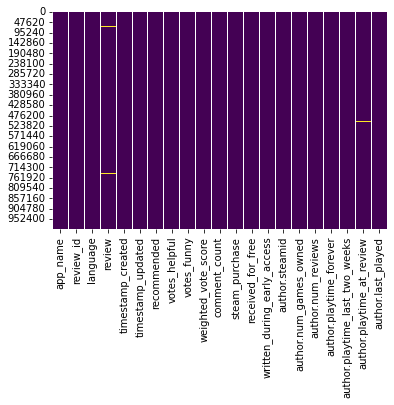

In [ ]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

As we said above, the two column missing data are <b/>review</b> and <b/>author.playtime_at_review</b>.

Let's count the number of games we have in the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['app_name'])

In [ ]:
games_count=dataset['app_name'].value_counts().to_frame()

In [ ]:
games_count=games_count.sort_values('app_name',ascending=False)

In [ ]:
games_count

,app_name
PLAYERUNKNOWN'S BATTLEGROUNDS,1644255
Grand Theft Auto V,1019116
Tom Clancy's Rainbow Six Siege,841918
Terraria,672815
Garry's Mod,655524
...,...
Don't Escape: 4 Days to Survive,1013
Out of the Park Baseball 19,700
Shadow Complex Remastered,700
DRAGON QUEST HEROES™ II,600


As we can see we have 315 games reviewed in the dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


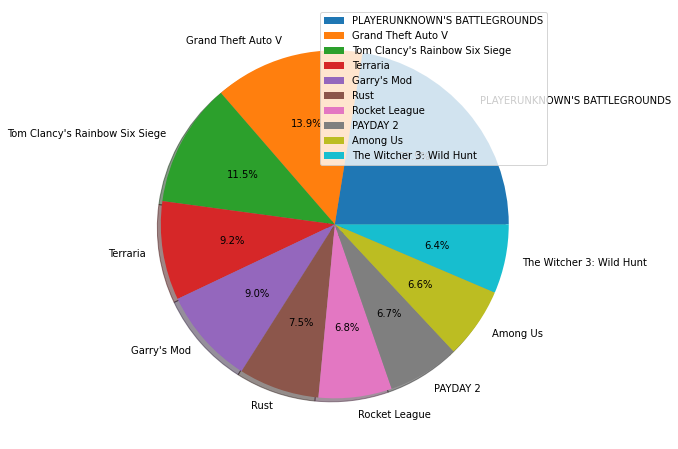

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
plt.pie(games_count[0:10],labels=dataset.app_name.value_counts()[0:10].index,shadow=True,autopct='%.1f%%')
plt.legend()
plt.show()

 We can't plot the whole games but we have chosen to plot only the top 10 games and the most reviewed game is  <b/>PlAYERUNKNOWN'S BATTLEGROUNDS</b>.

Let's do the same thing for the language.

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['language'])

In [ ]:
language_count=dataset['language'].value_counts().to_frame()

In [ ]:
language_count.apply(lambda x: 100*x/x.sum())

,language
english,44.306215
schinese,17.312286
russian,10.800846
brazilian,3.851151
spanish,3.739854
german,3.460630
turkish,2.923884
koreana,2.821638
french,2.491110
polish,2.278570


As we can see English is the most used language in the reviews and it represents 44.3% from the dataset. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


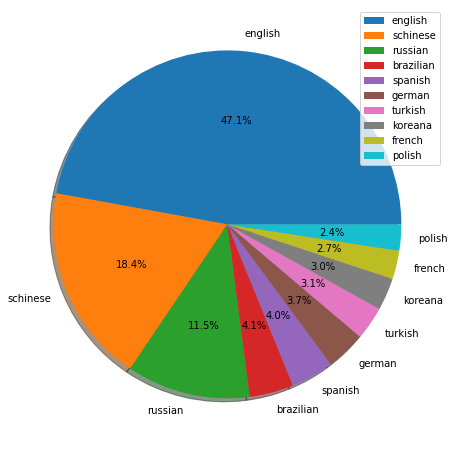

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
plt.pie(language_count[0:10],labels=dataset.language.value_counts().index[0:10],shadow=True,autopct='%.1f%%')
plt.legend()
plt.show()

We couldn't plot all the languages but we ploted only the first 10, and english represents 47% from the first 10 languages.

As we can see we have many language and this plot is not so clear so lets check the 7 most used languages.

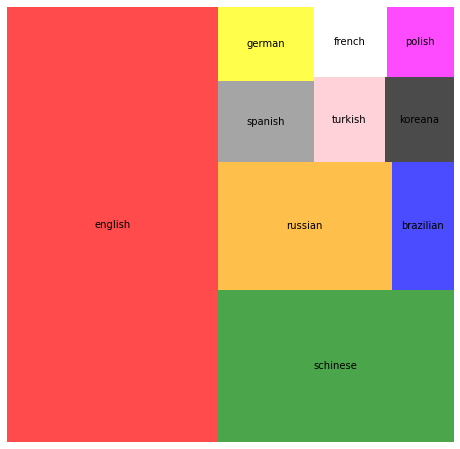

In [ ]:
top_language_n = 10
top_language = dataset.loc[:,'language'].value_counts()\
[:top_language_n].sort_values(ascending=False)
squarify.plot(sizes=top_language, label=top_language.index.array,\
color=["red","green","orange","blue","grey","yellow","pink","black","white","magenta"], alpha=.7 )
plt.axis('off')
plt.show()

Let's see if there is any correlation between the games and the language.

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['app_name','language'])

## [RQ2] Let's explore the dataset by finding simple insights into the reviews.

In [ ]:
dataset1 = pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['app_name','review'])

### Let's plot the number of reviews for each application in descending order.

In [ ]:
numbofreviews=dataset1.groupby('app_name',sort=True).review.count().sort_values(ascending=False)

In [ ]:
numbofreviews.to_frame()

,review
app_name,
PLAYERUNKNOWN'S BATTLEGROUNDS,1643246
Grand Theft Auto V,1017315
Tom Clancy's Rainbow Six Siege,840316
Terraria,671774
Garry's Mod,654511
...,...
Don't Escape: 4 Days to Survive,1011
Out of the Park Baseball 19,700
Shadow Complex Remastered,700


Ploting the whole application won't be clear, so we chose to plot only the top 10.

Text(0, 0.5, 'number of reviews')

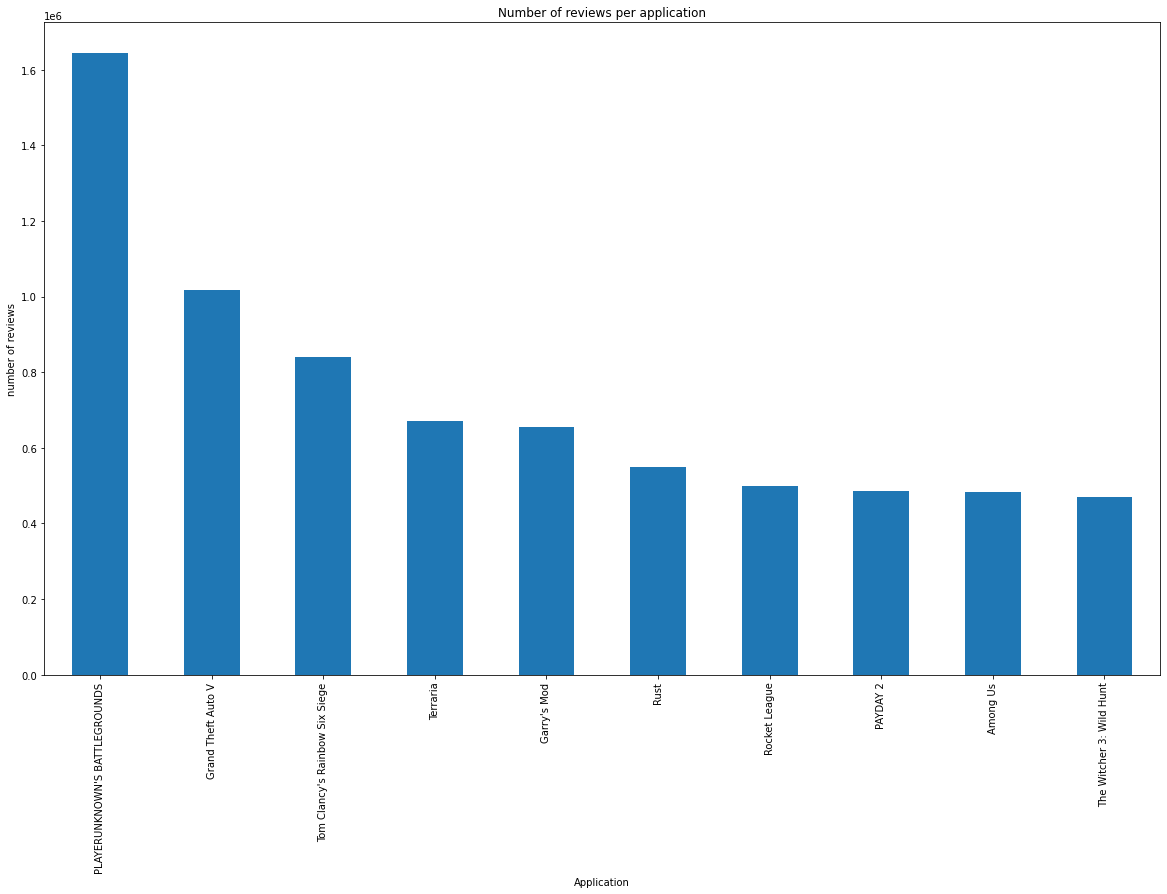

In [ ]:
plt.rcParams['figure.figsize']=(20,12)
numbofreviews[:10].plot(kind="bar")
plt.xticks(horizontalalignment="center")
plt.title("Number of reviews per application")
plt.xlabel("Application")
plt.ylabel("number of reviews")

### What applications have the best Weighted Vote Score?

In [ ]:
dataset2 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','weighted_vote_score'])

In [ ]:
sortedbywvs=dataset2.sort_values('weighted_vote_score',ascending=False)

In [ ]:
sortedbywvs=sortedbywvs.drop_duplicates(subset='app_name')

In [ ]:
print("The 20 best Weighted Vote Score applications are ")
for app_name in sortedbywvs[:20].app_name.unique():
    print(f'{app_name}  ')

The 20 best Weighted Vote Score applications are 
Stardew Valley  
Divinity: Original Sin 2  
Subnautica  
Mirror  
Wallpaper Engine  
Terraria  
The Forest  
Monster Hunter: World  
The Elder Scrolls Online  
Human: Fall Flat  
DARK SOULS™ III  
No Man's Sky  
Undertale  
Kenshi  
DEATH STRANDING  
Watch_Dogs 2  
Darkest Dungeon®  
Frostpunk  
The Elder Scrolls V: Skyrim  
The Witcher 3: Wild Hunt  


### Which applications have the most and the least recommendations?

In [ ]:
dataset3 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','recommended'])

In [ ]:
appgroup=dataset3.groupby('app_name').sum()
sortrecommendf=appgroup.sort_values('recommended', ascending =False).reset_index()
sortrecommendf




,app_name,recommended
0,PLAYERUNKNOWN'S BATTLEGROUNDS,886417
1,Grand Theft Auto V,831311
2,Tom Clancy's Rainbow Six Siege,742397
3,Terraria,658741
4,Garry's Mod,632558
...,...,...
310,Out of the Park Baseball 19,594
311,Shadow Complex Remastered,587
312,Identity,439
313,DRAGON QUEST HEROES™ II,423


In [ ]:
sortrecommendf['app_name'][0]

"PLAYERUNKNOWN'S BATTLEGROUNDS"

In [ ]:
sortrecommendf['app_name'][314]

'Neon Hardcorps'

### How many of these applications were purchased, and how many were given for free?


In [ ]:
dataset3=pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['app_name','received_for_free','steam_purchase'])

In [ ]:
dataset3.groupby('app_name').received_for_free.value_counts()

app_name                               received_for_free
20XX                                   False                 3559
                                       True                    51
A Hat in Time                          False                34159
                                       True                   820
A Short Hike                           False                 5748
                                                            ...  
Youtubers Life                         True                   544
theHunter: Call of the Wild™           False                65077
                                       True                  2163
三国群英传8 Heroes of the Three Kingdoms 8  False                 8046
                                       True                    65
Name: received_for_free, Length: 630, dtype: int64

As We can see the majority of games have been received for free and purchased.

In [ ]:
group1=dataset3.loc[(dataset3['received_for_free']==True) & (dataset3['steam_purchase']==False)]

In [ ]:
group1.count()

app_name             359041
steam_purchase       359041
received_for_free    359041
dtype: int64

In [ ]:
group2=dataset3.loc[(dataset3['received_for_free']==False) & (dataset3['steam_purchase']==True)]

In [ ]:
group2.count()

app_name             16513412
steam_purchase       16513412
received_for_free    16513412
dtype: int64

So 359 041 were given for free and 16 513 412 were purchased.
We have considered as purchased just the app that were purchased on steam, using the variable 'steam purchase'. 

##RQ3


M : "/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv"


In [ ]:
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit='s')
dataset5 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','timestamp_created'],parse_dates=['timestamp_created'],date_parser=parsedate)

### What is the most common time that authors review an application?

In [ ]:
dataset5['timestamp_created'] = dataset5['timestamp_created'].dt.floor('Min')


In [ ]:
dataset5['timestamp_created'].head()

0   2021-01-23 06:00:00
1   2021-01-23 05:50:00
2   2021-01-23 05:46:00
3   2021-01-23 05:32:00
4   2021-01-23 05:23:00
Name: timestamp_created, dtype: datetime64[ns]

In [ ]:
dataset5['new_date'] = [d.date() for d in dataset5['timestamp_created']]
dataset5['new_time'] = [d.time() for d in dataset5['timestamp_created']]


In [ ]:
dataset5.head()

,app_name,timestamp_created,new_date,new_time
0,The Witcher 3: Wild Hunt,2021-01-23 06:00:00,2021-01-23,06:00:00
1,The Witcher 3: Wild Hunt,2021-01-23 05:50:00,2021-01-23,05:50:00
2,The Witcher 3: Wild Hunt,2021-01-23 05:46:00,2021-01-23,05:46:00
3,The Witcher 3: Wild Hunt,2021-01-23 05:32:00,2021-01-23,05:32:00
4,The Witcher 3: Wild Hunt,2021-01-23 05:23:00,2021-01-23,05:23:00


In [ ]:
dataset5.drop('timestamp_created', axis=1, inplace=True)
dataset5.drop('new_date', axis=1, inplace=True)

In [ ]:
dataset5.head()

,app_name,new_time
0,The Witcher 3: Wild Hunt,06:00:00
1,The Witcher 3: Wild Hunt,05:50:00
2,The Witcher 3: Wild Hunt,05:46:00
3,The Witcher 3: Wild Hunt,05:32:00
4,The Witcher 3: Wild Hunt,05:23:00


In [ ]:
groups=dataset5.groupby('new_time').count()
sortreview=groups.sort_values('app_name',ascending= False).reset_index()
sortreview.rename(columns={'app_name':'Num_times'})

,new_time,Num_times
0,14:50:00,19502
1,15:05:00,19370
2,14:37:00,19270
3,15:07:00,19248
4,15:04:00,19237
...,...,...
1435,06:07:00,11748
1436,05:54:00,11745
1437,05:51:00,11735
1438,06:20:00,11671


In [ ]:
groups.idxmax()

app_name    14:50:00
dtype: object

In [ ]:
groups.idxmin()

app_name    06:02:00
dtype: object

14:50 is the most common time that authors review an application, instead 06:02 is the worst common time. 

### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [ ]:
dataset5 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['review_id','app_name','timestamp_created'],parse_dates=['timestamp_created'],date_parser=parsedate)

In [ ]:
dataset5

,app_name,review_id,timestamp_created
0,The Witcher 3: Wild Hunt,85185598,2021-01-23 06:00:29
1,The Witcher 3: Wild Hunt,85185250,2021-01-23 05:50:30
2,The Witcher 3: Wild Hunt,85185111,2021-01-23 05:46:40
3,The Witcher 3: Wild Hunt,85184605,2021-01-23 05:32:50
4,The Witcher 3: Wild Hunt,85184287,2021-01-23 05:23:47
...,...,...,...
21747366,Half-Life: Alyx,65645125,2020-03-23 18:05:04
21747367,Half-Life: Alyx,65645115,2020-03-23 18:04:53
21747368,Half-Life: Alyx,65645100,2020-03-23 18:04:33
21747369,Half-Life: Alyx,65645066,2020-03-23 18:03:51


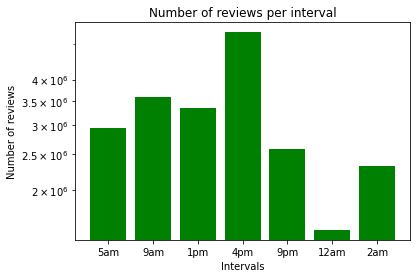

In [ ]:
def revperint(t_col):
    t_col = [datetime.datetime.strptime(t, '%H:%M:%S') for t in t_col]
    sec_1 = []
    min_1 = []
    ora_1 = []
    number_reviews = []
    for i in range(len(t_col)):
        sec_1.append(t_col[i].time().second)
        min_1.append(t_col[i].time().minute)
        ora_1.append(t_col[i].time().hour)
    for i in range(0, len(t_col), 2):
        number_reviews.append(dataset5[((dataset5['timestamp_created'].dt.hour >= ora_1[i]) & (dataset5['timestamp_created'].dt.minute >= min_1[i])) & (dataset5['timestamp_created'].dt.hour <= ora_1[i+1]) & (dataset5['timestamp_created'].dt.minute <= min_1[i+1]) & (dataset5['timestamp_created'].dt.second <= sec_1[i+1])].review_id.count())
        xx = ['5am', '9am', '1pm', '4pm', '9pm', '12am', '2am']
    plt.bar(xx, number_reviews, color = 'green')
    plt.yscale('log')
    plt.yticks([2000000, 2500000, 3000000, 3500000, 4000000])
    plt.title('Number of reviews per interval')
    plt.xlabel('Intervals')
    plt.ylabel('Number of reviews')
    plt.show()

int = ['05:00:00', '08:59:59', '09:00:00', '12:59:59', '13:00:00', '15:59:59',
        '16:00:00', '20:59:59', '21:00:00', '23:59:59', '00:00:00', '01:59:59', '02:00:00',
        '04:59:59']

revperint(int)

intervals = ['06:00:00', '10:59:59', '11:00:00', '13:59:59', '14:00:00', '16:59:59',
        '17:00:00', '19:59:59', '20:00:00', '23:59:59', '00:00:00', '02:59:59', '03:00:00',
        '05:59:59']

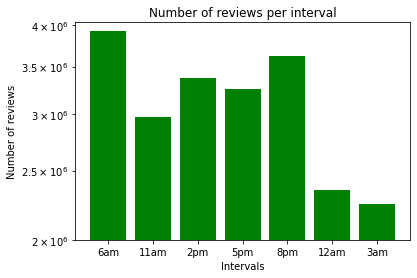

In [ ]:
def revperint(t_col):
    t_col = [datetime.datetime.strptime(t, '%H:%M:%S') for t in t_col]
    sec_1 = []
    min_1 = []
    ora_1 = []
    number_reviews = []
    for i in range(len(t_col)):
        sec_1.append(t_col[i].time().second)
        min_1.append(t_col[i].time().minute)
        ora_1.append(t_col[i].time().hour)
    for i in range(0, len(t_col), 2):
        number_reviews.append(dataset5[((dataset5['timestamp_created'].dt.hour >= ora_1[i]) & (dataset5['timestamp_created'].dt.minute >= min_1[i])) & (dataset5['timestamp_created'].dt.hour <= ora_1[i+1]) & (dataset5['timestamp_created'].dt.minute <= min_1[i+1]) & (dataset5['timestamp_created'].dt.second <= sec_1[i+1])].review_id.count())
        xx = ['6am', '11am', '2pm', '5pm', '8pm', '12am', '3am']
    plt.bar(xx, number_reviews, color = 'green')
    plt.yscale('log')
    plt.yticks([2000000, 2500000, 3000000, 3500000, 4000000])
    plt.title('Number of reviews per interval')
    plt.xlabel('Intervals')
    plt.ylabel('Number of reviews')
    plt.show()

intervals = ['06:00:00', '10:59:59', '11:00:00', '13:59:59', '14:00:00', '16:59:59',
        '17:00:00', '19:59:59', '20:00:00', '23:59:59', '00:00:00', '02:59:59', '03:00:00',
        '05:59:59']

revperint(intervals)



##RQ4


### What are the top 3 languages used to review applications?

In [ ]:
dataset6 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','language'])

In [ ]:
top_threelanguage_n = 3
top_threelanguage = dataset6.loc[:,'language'].value_counts()\
[:top_threelanguage_n].sort_values(ascending=False)

In [ ]:
top_threelanguage

english     9635437
schinese    3764967
russian     2348900
Name: language, dtype: int64

the top three language used to review applications are english, schinese and russian

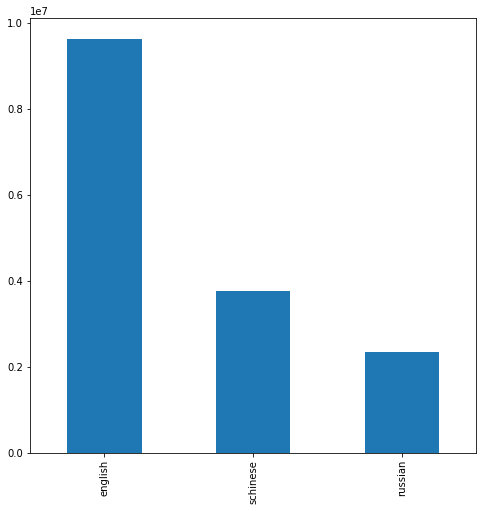

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
top_threelanguage.plot(kind="bar")


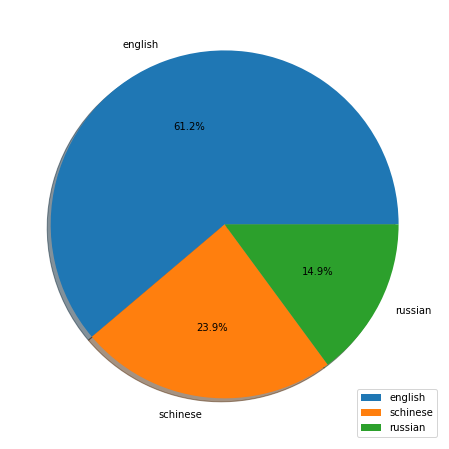

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
plt.pie(top_threelanguage,labels=top_threelanguage.index,shadow=True,autopct='%.1f%%')
plt.legend()
plt.show()

### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [ ]:
def reviewslang(df,languagelist):
  boolean_series = df.language.isin(languagelist)
  df = df[boolean_series]
  return df

In [ ]:
reviewslang(dataset6,['english','russian'])

,app_name,language
3,The Witcher 3: Wild Hunt,english
5,The Witcher 3: Wild Hunt,english
6,The Witcher 3: Wild Hunt,english
11,The Witcher 3: Wild Hunt,russian
13,The Witcher 3: Wild Hunt,russian
...,...,...
21747364,Half-Life: Alyx,english
21747366,Half-Life: Alyx,english
21747367,Half-Life: Alyx,english
21747368,Half-Life: Alyx,english


#Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [ ]:
dataset6 = pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['app_name','language','votes_funny'])

In [ ]:
rv=(reviewslang(dataset6,['english','russian','schinese'])[dataset6.votes_funny == 1].count().app_name/dataset6.count().app_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
"{:.0%}".format(rv)

'6%'

only 6% of these reviews were voted as funny

# Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?


In [ ]:
dataset7=pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['app_name','language','votes_helpful'])

In [ ]:
rv1=(reviewslang(dataset7,['english','russian','schinese'])[dataset7.votes_helpful == 1].count().app_name/dataset7.count().app_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
"{:.0%}".format(rv1)

'12%'

12% of these reviews were voted as helpful

## [RQ5] 

### Plot the top 10 most popular reviewers and the number of reviews.

#### Popularity considering the number of reviews (1)

In [ ]:
dataset8=pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['author.steamid','author.num_reviews'])

In [ ]:
authornumreviewssorted=dataset8.sort_values(by='author.num_reviews',ascending=False).drop_duplicates('author.steamid')

In [ ]:
popauthors=authornumreviewssorted[:10]

In [ ]:
popauthors

,author.steamid,author.num_reviews
13093694,76561198103272004,4398046511108
5663041,76561198848008157,4398046511105
20635080,76561198125392509,5236
9573424,76561198135438892,5148
19317066,76561198116879965,4795
20506779,76561197960373660,4137
20916025,76561198057389389,3775
12646364,76561198030784015,3473
21738795,76561197974092119,3468
20423630,76561198172925593,3216


#### Popularity considering the number of reviews registred in this dataset (2)

In [ ]:
populars=dataset3['author.steamid'].value_counts()
populars[0:10]

76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
Name: author.steamid, dtype: int64

These are the top popular authors regarding the number of their reviews in this dataset.

### What applications did the most popular author review?

From (1), the most popular author's steam id is 76561198103272004. 

In [ ]:
dataset3=pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['author.steamid','app_name'])

In [ ]:
popauthorgames=dataset3.loc[dataset3['author.steamid'] == 76561198103272004 ]
popauthorgames

,app_name,author.steamid
13093694,Grand Theft Auto V,76561198103272004


The most popular author reviewed one game in this dataset which is Grand Theft Auto V.

From (2), the most popular author's steam ID is 76561198062813911 .

In [ ]:
popauthorgames1=dataset3.loc[dataset3['author.steamid'] == 76561198062813911 ]
popauthorgames1

,app_name,author.steamid
512675,Half-Life,76561198062813911
539037,Counter-Strike: Source,76561198062813911
658130,Half-Life 2: Episode Two,76561198062813911
849477,Portal 2,76561198062813911
1549581,Garry's Mod,76561198062813911
...,...,...
21578107,Hollow Knight,76561198062813911
21624890,Day of Infamy,76561198062813911
21651066,SimAirport,76561198062813911
21656340,Dead Rising 4,76561198062813911


In [ ]:
popauthorgames1.drop_duplicates(subset=['app_name']).shape

(148, 2)

So he reviewed 148 games.

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [ ]:
dataset3=pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['author.steamid','app_name','received_for_free','steam_purchase'])

#### From (1), the most popular author's steam id is 76561198103272004.


In [ ]:
popapp=dataset3.loc[dataset3['author.steamid'] == 76561198103272004 ]

In [ ]:
popapp[(popapp['received_for_free'] == False ) & (popapp['steam_purchase'] == True)].count()

app_name             1
steam_purchase       1
received_for_free    1
author.steamid       1
dtype: int64

As we can see for this first case, the author purchased the one application he reviewed. Wich makes 100% of purchased and 0% free.

#### From (2), the most popular author's steam ID is 76561198062813911 .

In [ ]:
popapp1=dataset3.loc[dataset3['author.steamid'] == 76561198062813911  ]

In [ ]:
popapp1=popapp1.drop_duplicates('app_name')

In [ ]:
popapp1[(popapp1['received_for_free'] == False ) & (popapp1['steam_purchase'] == True)].count()

app_name             108
steam_purchase       108
received_for_free    108
author.steamid       108
dtype: int64

In [ ]:
popapp[(popapp['received_for_free'] == True ) & (popapp['steam_purchase'] == False)].count()

app_name             0
steam_purchase       0
received_for_free    0
author.steamid       0
dtype: int64

As we can see for this second case, the author purchased the 108 applications that he reviewed and which are ALL the application he reviwed. Wich makes 100% of purchased and 0% free.

### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [ ]:
dataset3=pd.read_csv("/content/drive/MyDrive/AMD/Dataset/Homework2/steam_reviews/steam_reviews.csv",usecols=['author.steamid','app_name','received_for_free','steam_purchase','recommended'])

#### From (1), the most popular author's steam id is 76561198103272004.

In [ ]:
popapp=dataset3.loc[dataset3['author.steamid'] == 76561198103272004 ]

In [ ]:
popapp

,app_name,recommended,steam_purchase,received_for_free,author.steamid
13093694,Grand Theft Auto V,True,True,False,76561198103272004


For this reviewer the only app he reviewed was purchased and the review was positive because he recommended it.

#### From (2), the most popular author's steam ID is 76561198062813911 .

In [ ]:
popapp=dataset3.loc[dataset3['author.steamid'] == 76561198062813911 ]

In [ ]:
popapp=popapp.drop_duplicates('app_name')

In [ ]:
popapp[(popapp['received_for_free'] == False ) & (popapp['steam_purchase'] == True) & (popapp['recommended'] == True)].count()

app_name             106
recommended          106
steam_purchase       106
received_for_free    106
author.steamid       106
dtype: int64

In [ ]:
popapp[(popapp['received_for_free'] == False ) & (popapp['steam_purchase'] == True) & (popapp['recommended'] == False)].count()

app_name             2
recommended          2
steam_purchase       2
received_for_free    2
author.steamid       2
dtype: int64

As we can see above and the questions before, he only reviewed purchased apps. And 106 of them were reviewed positively and 2 negatively. 

##RQ6


###  The average time (days and minutes) a user lets pass before he updates a review.

In [ ]:
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit='s')
dataset9=pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['author.steamid','timestamp_created',	'timestamp_updated'],parse_dates=['timestamp_created','timestamp_updated' ],date_parser=parsedate)

In [ ]:
dataset9['time_delta'] = (dataset9.timestamp_updated - dataset9.timestamp_created)

In [ ]:
dataset9.sort_values('time_delta',ascending= False).reset_index()

,index,timestamp_created,timestamp_updated,author.steamid,time_delta
0,14636766,2018-07-02 13:25:41,2040-08-05 09:33:57,76561198116664064,8069 days 20:08:16
1,10694933,2020-06-08 22:47:04,2042-03-25 18:57:27,76561197966082036,7959 days 20:10:23
2,9287504,2015-10-03 21:04:05,2037-02-03 21:05:26,76561198069242328,7794 days 00:01:21
3,3538178,2021-01-10 16:24:18,2042-05-11 00:59:57,76561198049701040,7790 days 08:35:39
4,1561447,2010-11-20 21:11:36,2021-01-17 10:02:52,76561197988124141,3710 days 12:51:16
...,...,...,...,...,...
21747366,8545955,2020-07-14 10:24:16,2020-07-14 10:24:16,76561198332177630,0 days 00:00:00
21747367,8545954,2020-07-14 10:27:42,2020-07-14 10:27:42,76561198208149329,0 days 00:00:00
21747368,8545953,2020-07-14 10:30:38,2020-07-14 10:30:38,76561198847913370,0 days 00:00:00
21747369,0,2021-01-23 06:00:29,2021-01-23 06:00:29,76561199095369542,0 days 00:00:00


We drop useless rows and useless cols

In [ ]:
dataset9.drop('timestamp_created', axis=1, inplace=True)
dataset9.drop('timestamp_updated', axis=1, inplace=True)

In [ ]:
dataset9.drop(dataset9[dataset9.time_delta == '0 days 00:00:00'].index, inplace=True)

In [ ]:
dataset9.head()

,author.steamid,time_delta
13,76561197987104694,0 days 00:01:11
27,76561198326913512,0 days 02:59:25
39,76561198020027165,0 days 00:01:09
41,76561198316530785,0 days 00:39:05
51,76561199039857291,0 days 00:00:51


In [ ]:
dataset9.tail()

,author.steamid,time_delta
21747356,76561198055305524,6 days 23:24:08
21747357,76561197997569585,0 days 00:48:28
21747362,76561198041215776,1 days 14:31:12
21747369,76561198041763187,16 days 03:43:11
21747370,76561198116747069,81 days 21:04:55


In [ ]:
(dataset9['time_delta']).mean()

Timedelta('321 days 00:46:24.845181776')

the mean is 321 days and 46 minutes

### Plot the top 3 authors that usually update their reviews

We sort and plot the authors that update more reviews

In [ ]:
groupautc=dataset9.groupby('author.steamid').count()
sortautc=groupautc.sort_values('time_delta',ascending= False).reset_index()
sortautc

,author.steamid,time_delta
0,76561198192166873,95
1,76561198206999976,61
2,76561198072450805,60
3,76561197997059777,59
4,76561197999935168,58
...,...,...
1644301,76561198095419888,1
1644302,76561198095419706,1
1644303,76561198095419227,1
1644304,76561198095418832,1


Text(0, 0.5, 'number of updates')

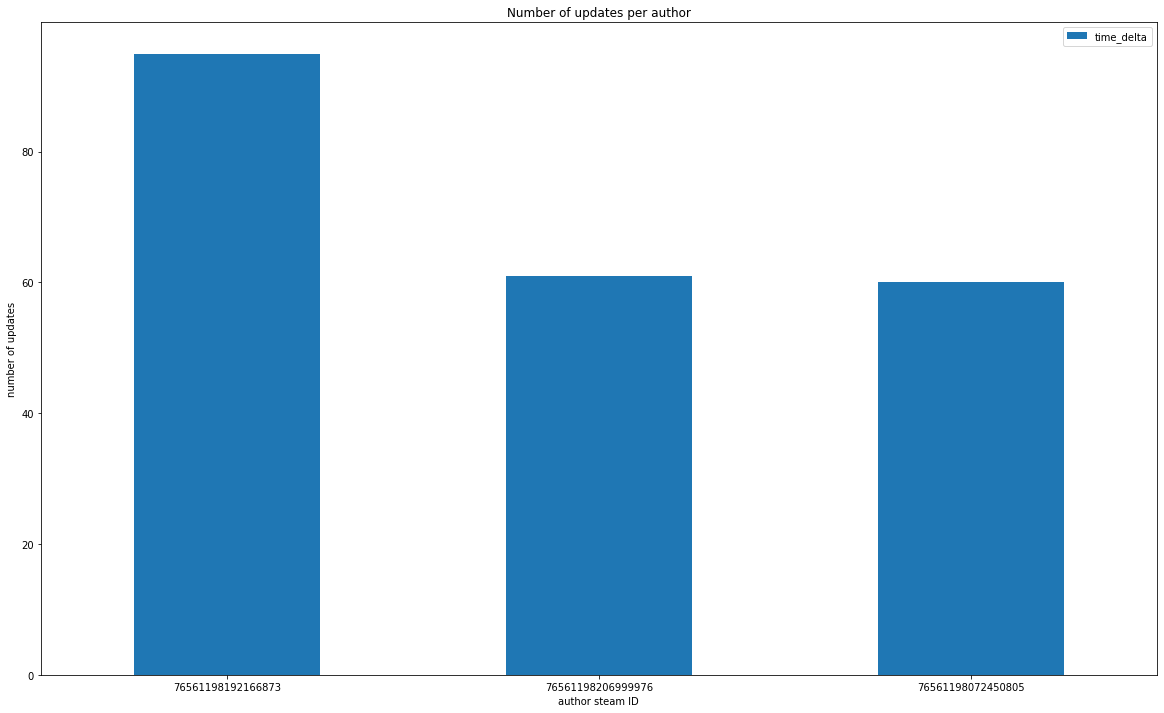

In [ ]:
plt.rcParams['figure.figsize']=(20,12)
sortautc[0:3].plot.bar(x='author.steamid',y='time_delta',rot=0)
plt.xticks(horizontalalignment="center")
plt.title("Number of updates per author")
plt.xlabel("author steam ID")
plt.ylabel("number of updates")

##RQ7

In [ ]:
dataset10 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','weighted_vote_score', 'votes_funny'])

In [ ]:
dataset10.head()

,app_name,votes_funny,weighted_vote_score
0,The Witcher 3: Wild Hunt,0,0.0
1,The Witcher 3: Wild Hunt,0,0.0
2,The Witcher 3: Wild Hunt,0,0.0
3,The Witcher 3: Wild Hunt,0,0.0
4,The Witcher 3: Wild Hunt,0,0.0


What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [ ]:
#votescore 

dataset10b=dataset10['weighted_vote_score'] >= 0.5
filtered_dataset10 = dataset10[dataset10b]
vs=len(filtered_dataset10)/len(dataset10)

In [ ]:
"{:.0%}".format(vs)

'22%'

the probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 22%

What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [ ]:
#prob vs
dataset10v=dataset10['weighted_vote_score'] > 0.5
filtered_dataset10v = dataset10[dataset10v]
vs2=len(filtered_dataset10v)/len(dataset10)

In [ ]:
#intersection
intersection = dataset10[(dataset10['votes_funny'] >= 1) & (dataset10['weighted_vote_score'] >0.5)]
intersec=(len(intersection))/len(dataset10)

In [ ]:
#prob cond
cond=intersec/vs2

In [ ]:
"{:.0%}".format(cond)

'25%'

here we have to use the formula of conditional probability.
the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 25%

Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [ ]:
#funny
dataset10f=dataset10['votes_funny'] >= 1
filtered_dataset10f = dataset10[dataset10f]
fun=len(filtered_dataset10f)/len(dataset10)

In [ ]:
"{:.0%}".format(fun)

'12%'

NO, they are not indipendent cause the conditional probability is different from the probability of funny, it's mean that an app is considered funny when has an high weighted vote score.

## [RQ8]

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [ ]:
dataset11 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','weighted_vote_score', 'language'])

In [ ]:
dataset11b=dataset11['language'] == 'schinese'
filtered_chinese = dataset11[dataset11b]
filtered_chinese.describe()


,weighted_vote_score
count,3.764967e+06
mean,1.455544e-01
std,2.395105e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,4.761905e-01
max,9.959868e-01


{'boxes': [<matplotlib.lines.Line2D at 0x7f97ac1cfa50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f97ac1d6b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f97ac1dbb50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f97ac1db610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f97ac1d6090>,
  <matplotlib.lines.Line2D at 0x7f97ac1d65d0>]}

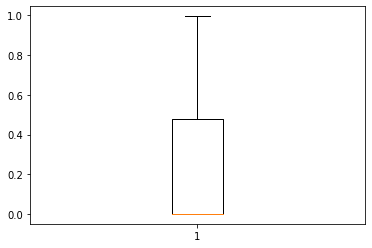

In [ ]:
plt.boxplot(filtered_chinese['weighted_vote_score'])

In [ ]:
dataset11c=dataset11['language'] == 'russian'
filtered_russian = dataset11[dataset11c]
filtered_russian.describe()

,weighted_vote_score
count,2.348900e+06
mean,2.135293e-01
std,2.577511e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.051732e-01
max,9.895231e-01


{'boxes': [<matplotlib.lines.Line2D at 0x7f97abd162d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f97abd1c350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f97abd23390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f97abd1ce10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f97abd16890>,
  <matplotlib.lines.Line2D at 0x7f97abd16dd0>]}

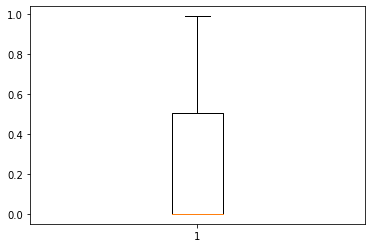

In [ ]:
plt.boxplot(filtered_russian['weighted_vote_score'])

The distribution are not normal so we have to use some non parametric test

In [ ]:
from scipy import stats

We use a non parametric test cause we don't assume hypotesis that the distribution is normal, so we consider the distribution as a non gaussian

In [ ]:
kruskal_test = stats.kruskal(filtered_chinese['weighted_vote_score'], filtered_russian['weighted_vote_score'])
kruskal_test


KruskalResult(statistic=101764.68814615528, pvalue=0.0)

In [ ]:
alpha = 0.05
pvalue=kruskal_test[1]
if pvalue<alpha:
  print('reject H0')
else:
  print('fail to reject H0')

reject H0




The p value is < alpha, it is equal to 0 so we reject H0  (null hypotesys).

We can note that with a just some rows pvalue is a little bit higher than 0, than when we used the entire dataset it is exactly 0

# Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

In [ ]:
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit='s')
dataset12 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','weighted_vote_score', 'timestamp_created','timestamp_updated'])

In [ ]:
dataset12['time_delta'] = (dataset12.timestamp_updated - dataset12.timestamp_created)

In [ ]:
dataset12.drop('timestamp_created', axis=1, inplace=True)
dataset12.drop('timestamp_updated', axis=1, inplace=True)

In [ ]:
dataset12.drop(dataset12[dataset12.time_delta == '0 days 00:00:00'].index, inplace=True)

In [ ]:
corr = dataset12.corr(method='pearson')
corr

,weighted_vote_score,time_delta
weighted_vote_score,1.000000,0.072047
time_delta,0.072047,1.000000


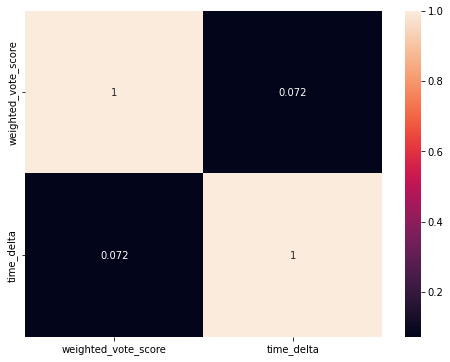

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,weighted_vote_score,time_delta
weighted_vote_score,1.000000,0.072047
time_delta,0.072047,1.000000


In [ ]:
#we can try to do scatter plot and add a comment

The correlation between the weighted vote score and the time that a users lets pass before he updates a review is very near at the zero. So we can say that these two variable are not correlated. 

# Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [ ]:
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit='s')
dataset13 = pd.read_csv("/content/drive/MyDrive/ADMHW2/steam_reviews.csv",usecols=['app_name','weighted_vote_score', 'timestamp_created','timestamp_updated', 'recommended'])

In [ ]:
dataset13['time_delta'] = (dataset13.timestamp_updated - dataset13.timestamp_created)

In [ ]:
dataset13.drop('timestamp_created', axis=1, inplace=True)
dataset13.drop('timestamp_updated', axis=1, inplace=True)
dataset13.drop(dataset13[dataset13.time_delta == '0 days 00:00:00'].index, inplace=True)

In [ ]:
corr2 = dataset13.corr(method='pearson')
corr2

,recommended,weighted_vote_score,time_delta
recommended,1.000000,-0.183002,-0.028590
weighted_vote_score,-0.183002,1.000000,0.072047
time_delta,-0.028590,0.072047,1.000000


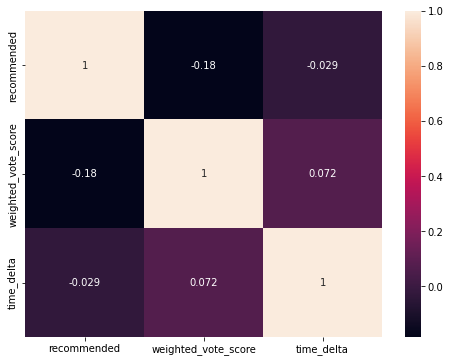

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True)
plt.show()

In [ ]:
corr2.style.background_gradient(cmap='coolwarm')

,recommended,weighted_vote_score,time_delta
recommended,1.000000,-0.183002,-0.028590
weighted_vote_score,-0.183002,1.000000,0.072047
time_delta,-0.028590,0.072047,1.000000


NO, there are no change in the relation between weighted vote score and time delta if we also include the variable 'reccomended'

# What are histograms, bar plots, scatterplots and pie charts used for?

A histogram is the most commonly used graph to show frequency distributions.
it is used to measure or summarize the distribution of data
It displays data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin.

A barplot is used to display and show the relationships between a numeric and a categorical variable.

A scatterplot is used to display and show relationships between two numeric variables.

A piecharts is used when you have categorical data and each slice represents the count or percentage of the observations of a level/category for the variable.

# What insights can you extract from a Box Plot?

Box plots provide a quick visual summary of the variability of values in a dataset. They show upper and lower quartiles, the median, min and max values, and any outliers in the dataset. the box is "composed" on the upper side from the upper quartiles and in the lower side from the lower quartiles, the median is drawn by a line in the box. and the min and the max are represented out of the box. Usually outliers are represented by some little circle, over the max value or below the min.

# Theoretical Questions

## TQ1

1. This algorithm computes recursively the smallest value of an array A.

2. The worst case possible is the largest possible running time of the algorithm, so that is when the randomly picked value 's' never meets the value needed to have k=r, generating a loop because the function won't stop to call itself. 
In this algorithm, the worst case possible will have the running time T(n)=O(n^2), due to the recursive part where the array part is repeatedly recalled for each iteration .

3. What is asymptotically the running time of the algorithm in the best case?
In the best case, k is equal to r and just return the value of s: in this case wehave just one call and its running time is T(n)=O(n).

## TQ2 

1.

Running Time of splitSwap(a,0,n):	T(n)

<b>Function splitSwap(a,l,n)</b>:
<br>If n<=1:....1.O(1) Constant time
<br>Return.....2.O(1) Constant time
<br>splitSwap(a,l,n/2).... 3.O(n/2) 	
<br>splitSwap(a,l+n/2,n/2)....4.O(n/2)  Constant time 
swapList(a,l,n)...5.O(n)

<b>Function swapList(a,l,n)</b>:
<br>For I = 0 to n/2:....6.O(n/2)
<br>Temp = a[i+1].....7.O(1)
<br>A[l+i] = a[l+n/2+i]....8.O(1)
<br>A[l+n/2+i] = tmp....9.O(1)
	
	
The overall time complexity of the splitSwap function will be

T(n) = O(1)+ O(1)+ O(n/2)+ O(n/2)+ O(n)+ O(n/2)+ O(1)+ O(1)+ O(1)	
Ignoring the constant term
<br>T(n) = O(n/2)+O(n)+O(n/2)
T(n) = O(n)


2.
 
<b>What does the Algorithm do</b>:
<br>The Algorithm is swapping the elements of the list or array. 
<br><b>Is it optimal:</b>
<br>Yes the algorithm is optimal. Because it divide and conquer the given list in to two similar, but simpler sub problem. And then it compose their solutions to solve the swapping of the elements of the list.
<br><b>Mechanism Of The problem:</b> 
<br>The algorithm first call recursively to itself and pass the array, first index and the size of the list as half. Then it call itself recursively and pass the array, and the index start from the mid of the list. And the size is also half of the array. 
At the last, the statement call to function name swap List and pass the array, index and total size of the array. The for loop in the swap List is running up to mid of the array. Basically the for loop doing swapping operation on the list. 



## TQ3

Counter Example:

W : 1 1000     20 30 40 9
V: 8 8000    8 8 8 1
Maximum Capacity of knapsack = 1000
There is weight Versus values. Both are sorted by the value by weight ration.


Consider the above weight value pair. I've sorted according to value by weight ratio. If we use 0/1 knapsack approach, we would get Profit = 8000 because we will pick second item i.e. weight = 1000.
Using KnapSack Fractional approach
 we will get 
profit  = 10+(888/1000)*8000 = 8001
If we select first item, capacity become 888, as a result we cannot select second item.Therefor we are ignoring the second item. Now we have capacity to select all items so take them. 
Total profit will be  = 8 + 8+ 8+ 8 + 1 = 33 = W
Here we have  8000> 200*W. 
So in this example, the heuristic fails to provide the optimal solutions.
These are the counter examples in which selecting more value/weight ratio item can fails in providing the optimal solutions.
